In [2]:
# Proj flight price

In [3]:
# Required imporrts
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_percentage_error,mean_squared_error

import plotly
from plotly import __version__
import cufflinks as cf
from plotly.offline import download_plotlyjs , init_notebook_mode , plot , iplot
init_notebook_mode(connected= True)   ### to connect to notebook
cf.go_offline()

In [4]:
df = pd.read_csv(r"C:\Users\maner\OneDrive\Desktop\New folder\Pandas dataset\proj datasets\Data_Train.xlsx - Sheet1.csv")

In [5]:
display(df.head())
print("-"*100)
print(f"Shape of the data frame is --> {df.shape}")
print("-"*100)
print(df.info())

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


----------------------------------------------------------------------------------------------------
Shape of the data frame is --> (10683, 11)
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB
None


# Data Preprocessing

In [6]:
# checking nulls
df.isnull().sum()[df.isnull().sum()>0]

Route          1
Total_Stops    1
dtype: int64

In [7]:
# dropping nulls
df = df.dropna()

In [8]:
df.isnull().sum()[df.isnull().sum()>0]

Series([], dtype: int64)

In [9]:
# converting Date_of_Journey,Dep_Time,Arrival_Time to datetime foramt 
df.Date_of_Journey = pd.to_datetime(df.Date_of_Journey,  format="%d/%m/%Y")
df.Dep_Time = pd.to_datetime(df.Dep_Time)
df.Arrival_Time = pd.to_datetime(df.Arrival_Time)

In [10]:
# extracting the required information
df['Day_of_Journey'] = df.Date_of_Journey.dt.day
df['Month_of_Journey'] = df.Date_of_Journey.dt.month
df['Dayname_of_Journey'] = df.Date_of_Journey.dt.day_name()

In [11]:
df['Dep_Hour'] = df.Dep_Time.dt.hour
df['Dep_Minutes'] = df.Dep_Time.dt.minute

In [12]:
df['Arrival_Hour'] = df.Arrival_Time.dt.hour
df['Arrival_Minutes'] = df.Arrival_Time.dt.minute

In [13]:
dur = []
for rec in df.Duration:
    if len(rec.split()) != 2:
        if 'h' in rec:
            dur.append(rec.strip()+' 0m')
        else:
            dur.append('0h '+rec.strip())
    else:
        dur.append(rec.strip())
Duration_hours = []
Duration_mins = []
for i in dur:
    Duration_hours.append(int(i.split('h')[0]))
    Duration_mins.append(int(i.split('m')[0].split()[1]))

In [14]:
df['Duration_hours'] = Duration_hours
df['Duration_mins'] = Duration_mins

In [15]:
df = df.drop(['Date_of_Journey','Dep_Time','Arrival_Time','Duration'], axis = 1)

In [16]:
df.Additional_Info.value_counts()
# most of the records has no_info

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [17]:
df.Route.value_counts()
# not that informative as Total_Stops, Source, Destination  can compensate this column

DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: Route, Length: 128, dtype: int64

In [18]:
# Dropping the non informative columns
df = df.drop(['Route','Additional_Info'], axis = 1)

# EDA

In [18]:
df.pivot_table(values = 'Price', columns='Airline', aggfunc = {'mean', 'min', 'max'})

Airline,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
max,13774.000000,31945.000000,22794.000000,22153.000000,54826.000000,79512.000000,36983.000000,14629.000000,23267.000000,4140.0,21730.000000,11793.000000
mean,5590.260188,9612.427756,5861.056701,5673.682903,11643.923357,58358.666667,10902.678094,11418.846154,4338.284841,4140.0,7796.348643,8962.333333
min,3383.000000,2050.000000,3398.000000,2227.000000,1840.000000,46490.000000,5797.000000,9845.000000,1759.000000,4140.0,3687.000000,5969.000000


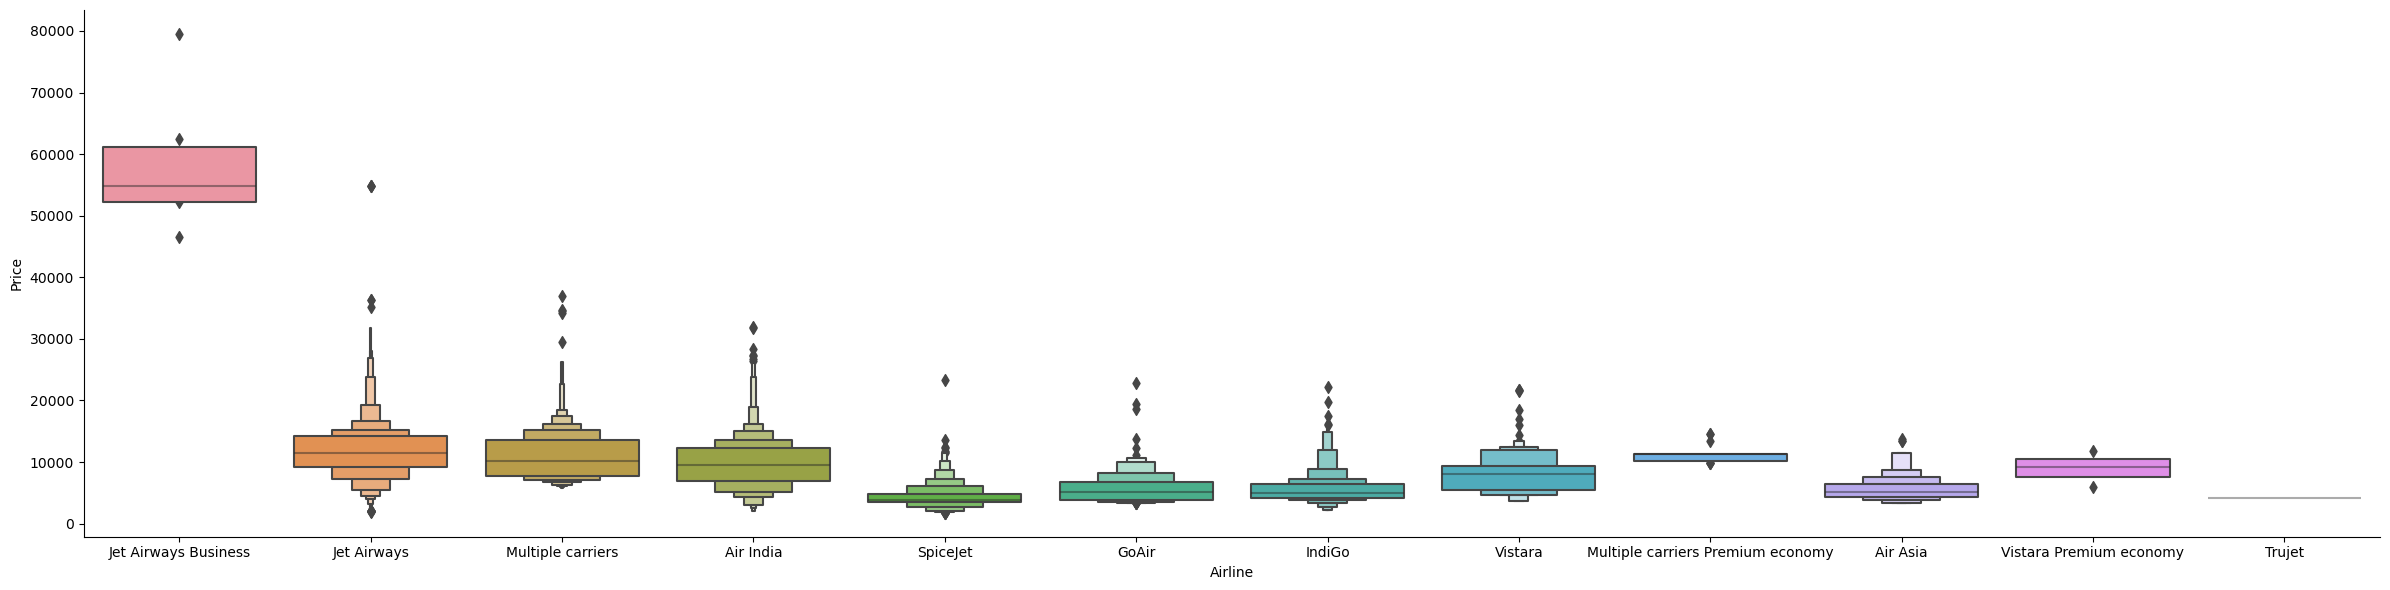

In [19]:
sns.catplot( x= 'Airline', y = 'Price', data = df.sort_values("Price", ascending = False), 
            kind = 'boxen',height = 6, aspect = 4);
# Jet Airways Business is expensive and spicejet is one of the economy base carriers

In [19]:
airline_counts = df['Airline'].value_counts().reset_index().sort_values(by='Airline', ascending=False)
airline_counts.columns = ['Airline','count']
display(airline_counts)

,Airline,count
0,Jet Airways,3849
1,IndiGo,2053
2,Air India,1751
3,Multiple carriers,1196
4,SpiceJet,818
5,Vistara,479
6,Air Asia,319
7,GoAir,194
8,Multiple carriers Premium economy,13
9,Jet Airways Business,6


In [20]:
plotly.express.pie(airline_counts.head(8), names = 'Airline', values = 'count', title='Count of Top 8 Airlines')
# most planes are of Jet Airways
# more than 50% of flights are of Jet Airways and IndiGo

,Source,count
0,Delhi,4536
1,Kolkata,2871
2,Banglore,2197
3,Mumbai,697
4,Chennai,381


---------------------------------------------------------------------------------------------------------------------------


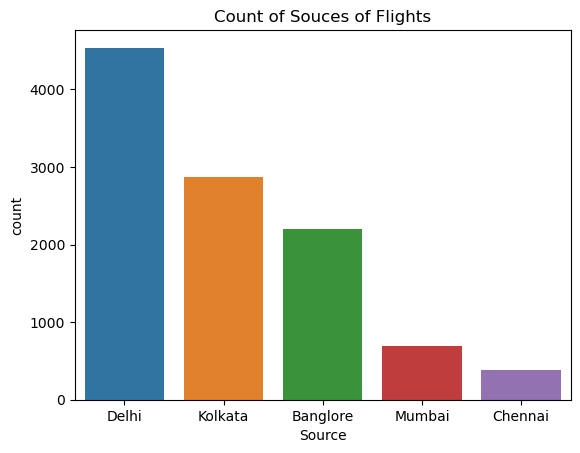

In [21]:
source_counts = df['Source'].value_counts().reset_index().sort_values(by='Source', ascending=False)
source_counts.columns = ['Source','count']
display(source_counts)
print("-"*123)
sns.barplot(data = source_counts, x = 'Source', y = 'count' )
plt.title("Count of Souces of Flights");

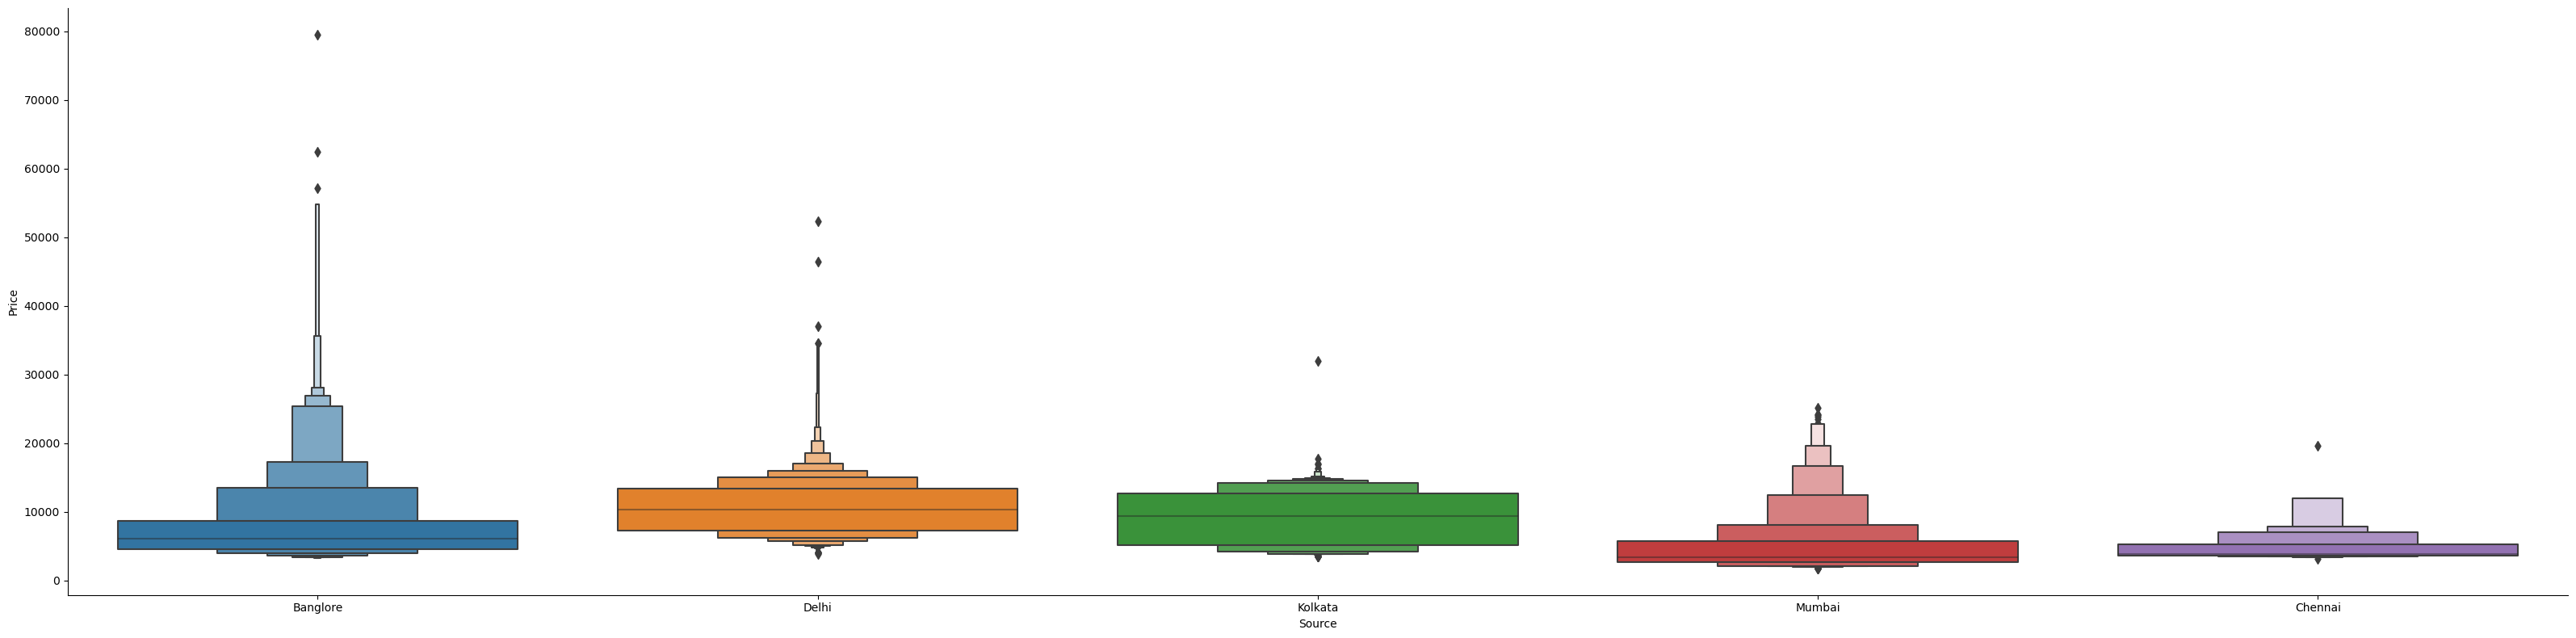

In [22]:
sns.catplot(y = 'Price', x= 'Source', data = df.sort_values('Price', ascending = False), 
            kind = 'boxen', height = 8, aspect = 4);

# Label Encoding 

In [23]:
df.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [24]:
df.Total_Stops.replace({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}, inplace = True)

In [25]:
df.Dayname_of_Journey.unique()

array(['Sunday', 'Wednesday', 'Friday', 'Monday', 'Tuesday', 'Saturday',
       'Thursday'], dtype=object)

In [26]:
df.Dayname_of_Journey.replace({'Sunday':6, 'Wednesday':3, 'Friday':5, 'Monday':1, 'Tuesday':2, 'Saturday':5,'Thursday':4}, 
                              inplace = True)

In [27]:
# one hot encoding remaing categorical columns
df = pd.get_dummies(df)

In [28]:
# info of cleaned data
display(df.head())
print("-"*100)
print(f"Shape of the cleaned data frame is --> {df.shape}")
print("-"*100)
print(df.info())

,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Dayname_of_Journey,Dep_Hour,Dep_Minutes,Arrival_Hour,Arrival_Minutes,Duration_hours,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,6,22,20,1,10,2,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,3,5,50,13,15,7,...,0,0,1,0,1,0,0,0,0,0
2,2,13882,9,6,6,9,25,4,25,19,...,0,1,0,0,0,1,0,0,0,0
3,1,6218,12,5,6,18,5,23,30,5,...,0,0,1,0,1,0,0,0,0,0
4,1,13302,1,3,5,16,50,21,35,4,...,0,0,0,0,0,0,0,0,0,1


----------------------------------------------------------------------------------------------------
Shape of the cleaned data frame is --> (10682, 34)
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 34 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Total_Stops                                10682 non-null  int64
 1   Price                                      10682 non-null  int64
 2   Day_of_Journey                             10682 non-null  int64
 3   Month_of_Journey                           10682 non-null  int64
 4   Dayname_of_Journey                         10682 non-null  int64
 5   Dep_Hour                                   10682 non-null  int64
 6   Dep_Minutes                                10682 non-null  int64
 7   Arr

In [29]:
# Random Sampling

In [30]:
from sklearn.model_selection import train_test_split
train, test =  train_test_split(df, test_size=0.2, random_state=42)

In [31]:
X_train = train.drop('Price', axis = 1)
y_train = train.Price

X_test = test.drop('Price', axis = 1)
y_test = test.Price

In [32]:
print(f"Shape of X_train is -->{X_train.shape}")
print(f"Shape of y_train is -->{y_train.shape}")
print("-"*123)
print(f"Shape of X_test is -->{X_test.shape}")
print(f"Shape of y_test is -->{y_test.shape}")

Shape of X_train is -->(8545, 33)
Shape of y_train is -->(8545,)
---------------------------------------------------------------------------------------------------------------------------
Shape of X_test is -->(2137, 33)
Shape of y_test is -->(2137,)


In [33]:
eval_df = pd.DataFrame()
def check_model(model):
    """
    input object created for model
    """
    global r_sqr, pred_train, pred_test, eval_df
    #model
    model.fit(X_train, y_train)
    model_name = str(model)
    
    pred_train = model.predict(X_train)
    pred_test =  model.predict(X_test)
    
    # metrics
    r_sqr = model.score(X_train, y_train)
    
    n = X_train.shape[0]
    k = X_train.shape[1]
    Adj_r = 1 - (1-r_sqr)*(n-1)/(n-k-1)

    mse_train = mean_squared_error(y_train, pred_train)
    rmse_train = np.sqrt(mse_train)
    mape_train = mean_absolute_percentage_error(y_train, pred_train)

    mse_test = mean_squared_error(y_test, pred_test)
    rmse_test = np.sqrt(mse_test)
    mape_test = mean_absolute_percentage_error(y_test, pred_test)
    
    # Evaluation data
    temp_df = pd.DataFrame(data = {'r_sqr':r_sqr ,'Adj_r2':Adj_r,
                            'mse_train':mse_train,'rmse_train':rmse_train,'mape_train':mape_train,
                            'mse_test':mse_test,'rmse_test':rmse_test,'mape_test':mape_test}, index = [model_name])
    eval_df = pd.concat([eval_df, temp_df]).apply(lambda x: np.round(x, 4))

    return eval_df

In [34]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [35]:
check_model(lr)

,r_sqr,Adj_r2,mse_train,rmse_train,mape_train,mse_test,rmse_test,mape_test
LinearRegression(),0.6268,0.6253,7908316.38,2812.1729,0.2363,8.122350e+06,2849.9737,0.2368


In [36]:
from sklearn.linear_model import Ridge
rdg = Ridge()
check_model(rdg)

,r_sqr,Adj_r2,mse_train,rmse_train,mape_train,mse_test,rmse_test,mape_test
LinearRegression(),0.6268,0.6253,7.908316e+06,2812.1729,0.2363,8.122350e+06,2849.9737,0.2368
Ridge(),0.6253,0.6238,7.939707e+06,2817.7485,0.2368,8.138642e+06,2852.8305,0.2372


In [37]:
from sklearn.linear_model import Lasso
lasso = Lasso()
check_model(lasso)

,r_sqr,Adj_r2,mse_train,rmse_train,mape_train,mse_test,rmse_test,mape_test
LinearRegression(),0.6268,0.6253,7.908316e+06,2812.1729,0.2363,8.122350e+06,2849.9737,0.2368
Ridge(),0.6253,0.6238,7.939707e+06,2817.7485,0.2368,8.138642e+06,2852.8305,0.2372
Lasso(),0.6266,0.6251,7.913228e+06,2813.0460,0.2364,8.128198e+06,2850.9994,0.2367


In [38]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(learning_rate=1.1)
check_model(gb)
# best at learning_rate 1.1

,r_sqr,Adj_r2,mse_train,rmse_train,mape_train,mse_test,rmse_test,mape_test
LinearRegression(),0.6268,0.6253,7.908316e+06,2812.1729,0.2363,8.122350e+06,2849.9737,0.2368
Ridge(),0.6253,0.6238,7.939707e+06,2817.7485,0.2368,8.138642e+06,2852.8305,0.2372
Lasso(),0.6266,0.6251,7.913228e+06,2813.0460,0.2364,8.128198e+06,2850.9994,0.2367
GradientBoostingRegressor(learning_rate=1.1),0.8723,0.8718,2.705536e+06,1644.8514,0.1396,5.402926e+06,2324.4196,0.1582


In [39]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor()
check_model(ada)

,r_sqr,Adj_r2,mse_train,rmse_train,mape_train,mse_test,rmse_test,mape_test
LinearRegression(),0.6268,0.6253,7.908316e+06,2812.1729,0.2363,8.122350e+06,2849.9737,0.2368
Ridge(),0.6253,0.6238,7.939707e+06,2817.7485,0.2368,8.138642e+06,2852.8305,0.2372
Lasso(),0.6266,0.6251,7.913228e+06,2813.0460,0.2364,8.128198e+06,2850.9994,0.2367
GradientBoostingRegressor(learning_rate=1.1),0.8723,0.8718,2.705536e+06,1644.8514,0.1396,5.402926e+06,2324.4196,0.1582
AdaBoostRegressor(),0.4915,0.4896,1.077414e+07,3282.3980,0.4340,1.095021e+07,3309.1094,0.4393


In [40]:
import catboost
from catboost import CatBoostRegressor
cat = CatBoostRegressor()
check_model(cat)

Learning rate set to 0.057463
0:	learn: 4439.5423853	total: 146ms	remaining: 2m 26s
1:	learn: 4308.4646189	total: 152ms	remaining: 1m 15s
2:	learn: 4165.3578640	total: 158ms	remaining: 52.6s
3:	learn: 4033.6530522	total: 164ms	remaining: 40.7s
4:	learn: 3930.9832329	total: 170ms	remaining: 33.8s
5:	learn: 3819.6278343	total: 175ms	remaining: 29s
6:	learn: 3724.2420972	total: 180ms	remaining: 25.5s
7:	learn: 3623.0322530	total: 185ms	remaining: 22.9s
8:	learn: 3527.8233037	total: 189ms	remaining: 20.8s
9:	learn: 3441.2484415	total: 193ms	remaining: 19.1s
10:	learn: 3374.2663401	total: 196ms	remaining: 17.6s
11:	learn: 3301.8686399	total: 199ms	remaining: 16.4s
12:	learn: 3238.8394759	total: 203ms	remaining: 15.4s
13:	learn: 3184.0813107	total: 207ms	remaining: 14.6s
14:	learn: 3125.4675871	total: 210ms	remaining: 13.8s
15:	learn: 3076.7022009	total: 214ms	remaining: 13.1s
16:	learn: 3023.2351368	total: 217ms	remaining: 12.6s
17:	learn: 2979.6978469	total: 222ms	remaining: 12.1s
18:	lear

177:	learn: 1927.6990371	total: 942ms	remaining: 4.35s
178:	learn: 1923.7565675	total: 948ms	remaining: 4.35s
179:	learn: 1922.8595694	total: 953ms	remaining: 4.34s
180:	learn: 1920.4475572	total: 957ms	remaining: 4.33s
181:	learn: 1917.6390287	total: 962ms	remaining: 4.33s
182:	learn: 1916.1920465	total: 967ms	remaining: 4.32s
183:	learn: 1912.0323321	total: 972ms	remaining: 4.31s
184:	learn: 1910.8501145	total: 977ms	remaining: 4.3s
185:	learn: 1909.1913439	total: 982ms	remaining: 4.3s
186:	learn: 1906.7819499	total: 987ms	remaining: 4.29s
187:	learn: 1905.6837030	total: 992ms	remaining: 4.28s
188:	learn: 1904.0624209	total: 997ms	remaining: 4.28s
189:	learn: 1902.4902845	total: 1s	remaining: 4.27s
190:	learn: 1899.4768557	total: 1.01s	remaining: 4.26s
191:	learn: 1898.0204636	total: 1.01s	remaining: 4.25s
192:	learn: 1897.3973022	total: 1.01s	remaining: 4.25s
193:	learn: 1896.3263215	total: 1.02s	remaining: 4.24s
194:	learn: 1894.9027332	total: 1.02s	remaining: 4.23s
195:	learn: 189

329:	learn: 1733.3683186	total: 1.69s	remaining: 3.44s
330:	learn: 1733.3437217	total: 1.7s	remaining: 3.43s
331:	learn: 1731.9181645	total: 1.7s	remaining: 3.42s
332:	learn: 1730.7135669	total: 1.71s	remaining: 3.42s
333:	learn: 1729.1549277	total: 1.71s	remaining: 3.42s
334:	learn: 1727.5526073	total: 1.72s	remaining: 3.41s
335:	learn: 1727.4407667	total: 1.72s	remaining: 3.4s
336:	learn: 1726.2772478	total: 1.73s	remaining: 3.4s
337:	learn: 1723.7529677	total: 1.73s	remaining: 3.39s
338:	learn: 1723.0437176	total: 1.74s	remaining: 3.39s
339:	learn: 1722.4529383	total: 1.74s	remaining: 3.38s
340:	learn: 1721.7123191	total: 1.75s	remaining: 3.38s
341:	learn: 1721.6147197	total: 1.75s	remaining: 3.37s
342:	learn: 1719.1792596	total: 1.76s	remaining: 3.37s
343:	learn: 1717.8617521	total: 1.76s	remaining: 3.36s
344:	learn: 1716.0546624	total: 1.77s	remaining: 3.36s
345:	learn: 1715.9586894	total: 1.77s	remaining: 3.35s
346:	learn: 1714.2972668	total: 1.78s	remaining: 3.34s
347:	learn: 17

493:	learn: 1585.5048091	total: 2.48s	remaining: 2.54s
494:	learn: 1584.6949792	total: 2.48s	remaining: 2.53s
495:	learn: 1583.3190889	total: 2.49s	remaining: 2.53s
496:	learn: 1582.8455799	total: 2.49s	remaining: 2.52s
497:	learn: 1582.2244660	total: 2.5s	remaining: 2.52s
498:	learn: 1581.1695859	total: 2.5s	remaining: 2.51s
499:	learn: 1580.7083741	total: 2.51s	remaining: 2.51s
500:	learn: 1580.2774989	total: 2.51s	remaining: 2.5s
501:	learn: 1579.8222373	total: 2.52s	remaining: 2.5s
502:	learn: 1579.0314759	total: 2.52s	remaining: 2.49s
503:	learn: 1579.0239720	total: 2.53s	remaining: 2.49s
504:	learn: 1578.1329943	total: 2.53s	remaining: 2.48s
505:	learn: 1577.1203231	total: 2.54s	remaining: 2.48s
506:	learn: 1576.6362182	total: 2.54s	remaining: 2.47s
507:	learn: 1575.9949990	total: 2.55s	remaining: 2.47s
508:	learn: 1575.0101329	total: 2.55s	remaining: 2.46s
509:	learn: 1574.4154880	total: 2.56s	remaining: 2.46s
510:	learn: 1574.4084356	total: 2.56s	remaining: 2.45s
511:	learn: 15

657:	learn: 1489.5983160	total: 3.27s	remaining: 1.7s
658:	learn: 1489.5954753	total: 3.28s	remaining: 1.7s
659:	learn: 1488.9595854	total: 3.29s	remaining: 1.69s
660:	learn: 1488.8337550	total: 3.29s	remaining: 1.69s
661:	learn: 1488.4908854	total: 3.29s	remaining: 1.68s
662:	learn: 1488.0627048	total: 3.3s	remaining: 1.68s
663:	learn: 1487.4065907	total: 3.31s	remaining: 1.67s
664:	learn: 1486.6600003	total: 3.31s	remaining: 1.67s
665:	learn: 1486.5785455	total: 3.32s	remaining: 1.66s
666:	learn: 1486.2421901	total: 3.32s	remaining: 1.66s
667:	learn: 1485.4338613	total: 3.33s	remaining: 1.65s
668:	learn: 1485.0136170	total: 3.33s	remaining: 1.65s
669:	learn: 1484.5052419	total: 3.34s	remaining: 1.64s
670:	learn: 1483.8843307	total: 3.34s	remaining: 1.64s
671:	learn: 1482.5934501	total: 3.35s	remaining: 1.63s
672:	learn: 1482.0343990	total: 3.35s	remaining: 1.63s
673:	learn: 1482.0320188	total: 3.36s	remaining: 1.62s
674:	learn: 1481.4409782	total: 3.36s	remaining: 1.62s
675:	learn: 1

817:	learn: 1415.9162743	total: 4.08s	remaining: 908ms
818:	learn: 1415.6826275	total: 4.09s	remaining: 904ms
819:	learn: 1415.1807661	total: 4.09s	remaining: 899ms
820:	learn: 1414.8177975	total: 4.1s	remaining: 894ms
821:	learn: 1414.3906030	total: 4.1s	remaining: 889ms
822:	learn: 1414.1489084	total: 4.11s	remaining: 884ms
823:	learn: 1413.5538230	total: 4.11s	remaining: 879ms
824:	learn: 1413.3548105	total: 4.12s	remaining: 874ms
825:	learn: 1412.6776325	total: 4.13s	remaining: 869ms
826:	learn: 1412.1219389	total: 4.13s	remaining: 864ms
827:	learn: 1411.8384408	total: 4.14s	remaining: 859ms
828:	learn: 1411.6518888	total: 4.14s	remaining: 854ms
829:	learn: 1411.0150230	total: 4.15s	remaining: 849ms
830:	learn: 1410.6331581	total: 4.15s	remaining: 844ms
831:	learn: 1410.1748769	total: 4.16s	remaining: 839ms
832:	learn: 1409.5630452	total: 4.16s	remaining: 834ms
833:	learn: 1409.1464173	total: 4.17s	remaining: 829ms
834:	learn: 1408.7857059	total: 4.17s	remaining: 824ms
835:	learn: 

999:	learn: 1351.1179613	total: 5.06s	remaining: 0us


,r_sqr,Adj_r2,mse_train,rmse_train,mape_train,mse_test,rmse_test,mape_test
LinearRegression(),0.6268,0.6253,7.908316e+06,2812.1729,0.2363,8.122350e+06,2849.9737,0.2368
Ridge(),0.6253,0.6238,7.939707e+06,2817.7485,0.2368,8.138642e+06,2852.8305,0.2372
Lasso(),0.6266,0.6251,7.913228e+06,2813.0460,0.2364,8.128198e+06,2850.9994,0.2367
GradientBoostingRegressor(learning_rate=1.1),0.8723,0.8718,2.705536e+06,1644.8514,0.1396,5.402926e+06,2324.4196,0.1582
AdaBoostRegressor(),0.4915,0.4896,1.077414e+07,3282.3980,0.4340,1.095021e+07,3309.1094,0.4393
<catboost.core.CatBoostRegressor object at 0x000001D47DF006D0>,0.9138,0.9135,1.825520e+06,1351.1180,0.1105,2.901738e+06,1703.4489,0.1315


In [41]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
check_model(dt)

,r_sqr,Adj_r2,mse_train,rmse_train,mape_train,mse_test,rmse_test,mape_test
LinearRegression(),0.6268,0.6253,7.908316e+06,2812.1729,0.2363,8.122350e+06,2849.9737,0.2368
Ridge(),0.6253,0.6238,7.939707e+06,2817.7485,0.2368,8.138642e+06,2852.8305,0.2372
Lasso(),0.6266,0.6251,7.913228e+06,2813.0460,0.2364,8.128198e+06,2850.9994,0.2367
GradientBoostingRegressor(learning_rate=1.1),0.8723,0.8718,2.705536e+06,1644.8514,0.1396,5.402926e+06,2324.4196,0.1582
AdaBoostRegressor(),0.4915,0.4896,1.077414e+07,3282.3980,0.4340,1.095021e+07,3309.1094,0.4393
<catboost.core.CatBoostRegressor object at 0x000001D47DF006D0>,0.9138,0.9135,1.825520e+06,1351.1180,0.1105,2.901738e+06,1703.4489,0.1315
DecisionTreeRegressor(),0.9692,0.9691,6.516124e+05,807.2251,0.0349,5.806947e+06,2409.7608,0.1467


In [42]:
params = {'max_depth' :range(14,30),
    'min_samples_split': (40,50,60)}

In [43]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(dt, param_grid=params)

In [44]:
check_model(gs)

,r_sqr,Adj_r2,mse_train,rmse_train,mape_train,mse_test,rmse_test,mape_test
LinearRegression(),0.6268,0.6253,7.908316e+06,2812.1729,0.2363,8.122350e+06,2849.9737,0.2368
Ridge(),0.6253,0.6238,7.939707e+06,2817.7485,0.2368,8.138642e+06,2852.8305,0.2372
Lasso(),0.6266,0.6251,7.913228e+06,2813.0460,0.2364,8.128198e+06,2850.9994,0.2367
GradientBoostingRegressor(learning_rate=1.1),0.8723,0.8718,2.705536e+06,1644.8514,0.1396,5.402926e+06,2324.4196,0.1582
AdaBoostRegressor(),0.4915,0.4896,1.077414e+07,3282.3980,0.4340,1.095021e+07,3309.1094,0.4393
<catboost.core.CatBoostRegressor object at 0x000001D47DF006D0>,0.9138,0.9135,1.825520e+06,1351.1180,0.1105,2.901738e+06,1703.4489,0.1315
DecisionTreeRegressor(),0.9692,0.9691,6.516124e+05,807.2251,0.0349,5.806947e+06,2409.7608,0.1467
"GridSearchCV(estimator=DecisionTreeRegressor(),\n param_grid={'max_depth': range(14, 30),\n 'min_samples_split': (40, 50, 60)})",0.8388,0.8382,3.416122e+06,1848.2755,0.1305,4.666331e+06,2160.1692,0.1453


In [45]:
gs.best_params_

{'max_depth': 15, 'min_samples_split': 50}

In [46]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth = 19)
check_model(rf)
# best result on test with max_depth =16

,r_sqr,Adj_r2,mse_train,rmse_train,mape_train,mse_test,rmse_test,mape_test
LinearRegression(),0.6268,0.6253,7.908316e+06,2812.1729,0.2363,8.122350e+06,2849.9737,0.2368
Ridge(),0.6253,0.6238,7.939707e+06,2817.7485,0.2368,8.138642e+06,2852.8305,0.2372
Lasso(),0.6266,0.6251,7.913228e+06,2813.0460,0.2364,8.128198e+06,2850.9994,0.2367
GradientBoostingRegressor(learning_rate=1.1),0.8723,0.8718,2.705536e+06,1644.8514,0.1396,5.402926e+06,2324.4196,0.1582
AdaBoostRegressor(),0.4915,0.4896,1.077414e+07,3282.3980,0.4340,1.095021e+07,3309.1094,0.4393
<catboost.core.CatBoostRegressor object at 0x000001D47DF006D0>,0.9138,0.9135,1.825520e+06,1351.1180,0.1105,2.901738e+06,1703.4489,0.1315
DecisionTreeRegressor(),0.9692,0.9691,6.516124e+05,807.2251,0.0349,5.806947e+06,2409.7608,0.1467
"GridSearchCV(estimator=DecisionTreeRegressor(),\n param_grid={'max_depth': range(14, 30),\n 'min_samples_split': (40, 50, 60)})",0.8388,0.8382,3.416122e+06,1848.2755,0.1305,4.666331e+06,2160.1692,0.1453
RandomForestRegressor(max_depth=19),0.9520,0.9518,1.017069e+06,1008.4986,0.0650,4.264359e+06,2065.0325,0.1290


In [47]:
rf = RandomForestRegressor()
params = {'max_depth' :range(10,30)}
from sklearn.model_selection import GridSearchCV
gs_rf = GridSearchCV(rf, param_grid=params)
check_model(gs_rf)

,r_sqr,Adj_r2,mse_train,rmse_train,mape_train,mse_test,rmse_test,mape_test
LinearRegression(),0.6268,0.6253,7.908316e+06,2812.1729,0.2363,8.122350e+06,2849.9737,0.2368
Ridge(),0.6253,0.6238,7.939707e+06,2817.7485,0.2368,8.138642e+06,2852.8305,0.2372
Lasso(),0.6266,0.6251,7.913228e+06,2813.0460,0.2364,8.128198e+06,2850.9994,0.2367
GradientBoostingRegressor(learning_rate=1.1),0.8723,0.8718,2.705536e+06,1644.8514,0.1396,5.402926e+06,2324.4196,0.1582
AdaBoostRegressor(),0.4915,0.4896,1.077414e+07,3282.3980,0.4340,1.095021e+07,3309.1094,0.4393
<catboost.core.CatBoostRegressor object at 0x000001D47DF006D0>,0.9138,0.9135,1.825520e+06,1351.1180,0.1105,2.901738e+06,1703.4489,0.1315
DecisionTreeRegressor(),0.9692,0.9691,6.516124e+05,807.2251,0.0349,5.806947e+06,2409.7608,0.1467
"GridSearchCV(estimator=DecisionTreeRegressor(),\n param_grid={'max_depth': range(14, 30),\n 'min_samples_split': (40, 50, 60)})",0.8388,0.8382,3.416122e+06,1848.2755,0.1305,4.666331e+06,2160.1692,0.1453
RandomForestRegressor(max_depth=19),0.9520,0.9518,1.017069e+06,1008.4986,0.0650,4.264359e+06,2065.0325,0.1290
"GridSearchCV(estimator=RandomForestRegressor(),\n param_grid={'max_depth': range(10, 30)})",0.9200,0.9197,1.694486e+06,1301.7241,0.1017,3.964310e+06,1991.0576,0.1331


In [48]:
gs_rf.best_params_

{'max_depth': 12}

In [49]:
import xgboost
from xgboost import XGBRegressor
xgbr = XGBRegressor()
check_model(xgbr)  

,r_sqr,Adj_r2,mse_train,rmse_train,mape_train,mse_test,rmse_test,mape_test
LinearRegression(),0.6268,0.6253,7.908316e+06,2812.1729,0.2363,8.122350e+06,2849.9737,0.2368
Ridge(),0.6253,0.6238,7.939707e+06,2817.7485,0.2368,8.138642e+06,2852.8305,0.2372
Lasso(),0.6266,0.6251,7.913228e+06,2813.0460,0.2364,8.128198e+06,2850.9994,0.2367
GradientBoostingRegressor(learning_rate=1.1),0.8723,0.8718,2.705536e+06,1644.8514,0.1396,5.402926e+06,2324.4196,0.1582
AdaBoostRegressor(),0.4915,0.4896,1.077414e+07,3282.3980,0.4340,1.095021e+07,3309.1094,0.4393
<catboost.core.CatBoostRegressor object at 0x000001D47DF006D0>,0.9138,0.9135,1.825520e+06,1351.1180,0.1105,2.901738e+06,1703.4489,0.1315
DecisionTreeRegressor(),0.9692,0.9691,6.516124e+05,807.2251,0.0349,5.806947e+06,2409.7608,0.1467
"GridSearchCV(estimator=DecisionTreeRegressor(),\n param_grid={'max_depth': range(14, 30),\n 'min_samples_split': (40, 50, 60)})",0.8388,0.8382,3.416122e+06,1848.2755,0.1305,4.666331e+06,2160.1692,0.1453
RandomForestRegressor(max_depth=19),0.9520,0.9518,1.017069e+06,1008.4986,0.0650,4.264359e+06,2065.0325,0.1290
"GridSearchCV(estimator=RandomForestRegressor(),\n param_grid={'max_depth': range(10, 30)})",0.9200,0.9197,1.694486e+06,1301.7241,0.1017,3.964310e+06,1991.0576,0.1331


In [50]:
from xgboost import XGBRFRegressor
xgbrfr = XGBRFRegressor()
check_model(xgbrfr)

,r_sqr,Adj_r2,mse_train,rmse_train,mape_train,mse_test,rmse_test,mape_test
LinearRegression(),0.6268,0.6253,7.908316e+06,2812.1729,0.2363,8.122350e+06,2849.9737,0.2368
Ridge(),0.6253,0.6238,7.939707e+06,2817.7485,0.2368,8.138642e+06,2852.8305,0.2372
Lasso(),0.6266,0.6251,7.913228e+06,2813.0460,0.2364,8.128198e+06,2850.9994,0.2367
GradientBoostingRegressor(learning_rate=1.1),0.8723,0.8718,2.705536e+06,1644.8514,0.1396,5.402926e+06,2324.4196,0.1582
AdaBoostRegressor(),0.4915,0.4896,1.077414e+07,3282.3980,0.4340,1.095021e+07,3309.1094,0.4393
<catboost.core.CatBoostRegressor object at 0x000001D47DF006D0>,0.9138,0.9135,1.825520e+06,1351.1180,0.1105,2.901738e+06,1703.4489,0.1315
DecisionTreeRegressor(),0.9692,0.9691,6.516124e+05,807.2251,0.0349,5.806947e+06,2409.7608,0.1467
"GridSearchCV(estimator=DecisionTreeRegressor(),\n param_grid={'max_depth': range(14, 30),\n 'min_samples_split': (40, 50, 60)})",0.8388,0.8382,3.416122e+06,1848.2755,0.1305,4.666331e+06,2160.1692,0.1453
RandomForestRegressor(max_depth=19),0.9520,0.9518,1.017069e+06,1008.4986,0.0650,4.264359e+06,2065.0325,0.1290
"GridSearchCV(estimator=RandomForestRegressor(),\n param_grid={'max_depth': range(10, 30)})",0.9200,0.9197,1.694486e+06,1301.7241,0.1017,3.964310e+06,1991.0576,0.1331


In [51]:
eval_df.sort_values('mape_test')
#best results are obtained from RandomForestRegressor(max_depth=15)
# it is able to explained 94.31% of total variation in target variable

,r_sqr,Adj_r2,mse_train,rmse_train,mape_train,mse_test,rmse_test,mape_test
RandomForestRegressor(max_depth=19),0.9520,0.9518,1.017069e+06,1008.4986,0.0650,4.264359e+06,2065.0325,0.1290
"XGBRegressor(base_score=None, booster=None, callbacks=None,\n colsample_bylevel=None, colsample_bynode=None,\n colsample_bytree=None, early_stopping_rounds=None,\n enable_categorical=False, eval_metric=None, feature_types=None,\n gamma=None, gpu_id=None, grow_policy=None, importance_type=None,\n interaction_constraints=None, learning_rate=None, max_bin=None,\n max_cat_threshold=None, max_cat_to_onehot=None,\n max_delta_step=None, max_depth=None, max_leaves=None,\n min_child_weight=None, missing=nan, monotone_constraints=None,\n n_estimators=100, n_jobs=None, num_parallel_tree=None,\n predictor=None, random_state=None, ...)",0.9367,0.9364,1.342183e+06,1158.5261,0.0932,3.112497e+06,1764.2271,0.1306
<catboost.core.CatBoostRegressor object at 0x000001D47DF006D0>,0.9138,0.9135,1.825520e+06,1351.1180,0.1105,2.901738e+06,1703.4489,0.1315
"GridSearchCV(estimator=RandomForestRegressor(),\n param_grid={'max_depth': range(10, 30)})",0.9200,0.9197,1.694486e+06,1301.7241,0.1017,3.964310e+06,1991.0576,0.1331
"GridSearchCV(estimator=DecisionTreeRegressor(),\n param_grid={'max_depth': range(14, 30),\n 'min_samples_split': (40, 50, 60)})",0.8388,0.8382,3.416122e+06,1848.2755,0.1305,4.666331e+06,2160.1692,0.1453
DecisionTreeRegressor(),0.9692,0.9691,6.516124e+05,807.2251,0.0349,5.806947e+06,2409.7608,0.1467
GradientBoostingRegressor(learning_rate=1.1),0.8723,0.8718,2.705536e+06,1644.8514,0.1396,5.402926e+06,2324.4196,0.1582
"XGBRFRegressor(base_score=None, booster=None, callbacks=None,\n colsample_bylevel=None, colsample_bytree=None,\n early_stopping_rounds=None, enable_categorical=False,\n eval_metric=None, feature_types=None, gamma=None, gpu_id=None,\n grow_policy=None, importance_type=None,\n interaction_constraints=None, max_bin=None,\n max_cat_threshold=None, max_cat_to_onehot=None,\n max_delta_step=None, max_depth=None, max_leaves=None,\n min_child_weight=None, missing=nan, monotone_constraints=None,\n n_estimators=100, n_jobs=None, num_parallel_tree=None,\n objective='reg:squarederror', predictor=None, random_state=None,\n reg_alpha=None, ...)",0.7431,0.7421,5.444146e+06,2333.2695,0.1938,5.997593e+06,2448.9983,0.1980
Lasso(),0.6266,0.6251,7.913228e+06,2813.0460,0.2364,8.128198e+06,2850.9994,0.2367
LinearRegression(),0.6268,0.6253,7.908316e+06,2812.1729,0.2363,8.122350e+06,2849.9737,0.2368
